<a href="https://www.linkedin.com/in/hern%C3%A1n-contigiani-41260679/"><img src="https://raw.githubusercontent.com/hernancontigiani/tf_certification/main/images/hc_banner.png" width="1000" align="center"></a>


# Tensorflow Developer Certification

Computer vision practice

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
!wget https://raw.githubusercontent.com/hernancontigiani/tf_certification/main/utils_tf.py
from utils_tf import *

--2021-12-22 02:06:26--  https://raw.githubusercontent.com/hernancontigiani/tf_certification/main/utils_tf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10220 (10.0K) [text/plain]
Saving to: ‘utils_tf.py.1’

utils_tf.py.1       100%[===================>]   9.98K  --.-KB/s    in 0s      

2021-12-22 02:06:26 (60.1 MB/s) - ‘utils_tf.py.1’ saved [10220/10220]



In [ ]:
import tensorflow_datasets as tfds

#https://www.tensorflow.org/datasets/catalog/stl10
(train_data, valid_data), ds_info = tfds.load(
                            name="stl10",
                            split=["train", "test"], # depends on the dataset
                            shuffle_files = True, # shuffle
                            as_supervised=True, # data will be return as (data, label)
                            with_info=True
                            )

In [ ]:
class_names = ds_info.features["label"].names
class_names

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [ ]:
img_shape = ds_info.features["image"].shape
img_shape

(96, 96, 3)

In [ ]:
one_sample = train_data.take(1)

In [ ]:
for image, label in one_sample:
    print("Image shape", image.shape, "and label", label, " with class name", class_names[label.numpy()])
print(image[0, :10, :])

Image shape (96, 96, 3) and label tf.Tensor(1, shape=(), dtype=int64)  with class name bird
tf.Tensor(
[[136 144 153]
 [125 127 136]
 [125 126 130]
 [120 122 117]
 [117 117 110]
 [113 114 109]
 [124 122 113]
 [123 121 112]
 [149 147 140]
 [139 129 119]], shape=(10, 3), dtype=uint8)


In [ ]:
# .shuffle(buffer_size=1000)
train_data = train_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = valid_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

### Raw model

In [ ]:
IMG_SIZE = 96

inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x = layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x = layers.Conv2D(8, 3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(16, 3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(32, 3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model_1.summary()
#tf.keras.layers.Resizing( )

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_38 (Conv2D)          (None, 96, 96, 8)         224       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 48, 48, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 48, 48, 16)        1168      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                      

In [ ]:
h1 = model_1.fit(
    train_data,
    steps_per_epoch=int(0.1*len(train_data)),
    validation_data=validation_data,
    validation_steps=int(0.1*len(validation_data)),
    epochs=10,
    callbacks=[create_modelcheckpoint_callback("model_1", monitor="val_accuracy")]
                 )

Epoch 1/10
15/15 [==============================] - 7s 401ms/step - loss: 2.3070 - accuracy: 0.0938 - val_loss: 2.2950 - val_accuracy: 0.1213
Epoch 2/10
15/15 [==============================] - 6s 381ms/step - loss: 2.2863 - accuracy: 0.1417 - val_loss: 2.2335 - val_accuracy: 0.1713
Epoch 3/10
15/15 [==============================] - 6s 377ms/step - loss: 2.1722 - accuracy: 0.1729 - val_loss: 2.1377 - val_accuracy: 0.1713
Epoch 4/10
15/15 [==============================] - 6s 379ms/step - loss: 2.0242 - accuracy: 0.2562 - val_loss: 1.8742 - val_accuracy: 0.2700
Epoch 5/10
15/15 [==============================] - 7s 511ms/step - loss: 1.9012 - accuracy: 0.2750 - val_loss: 1.8283 - val_accuracy: 0.2663
Epoch 6/10
15/15 [==============================] - 8s 532ms/step - loss: 1.9315 - accuracy: 0.2562 - val_loss: 1.9020 - val_accuracy: 0.2625
Epoch 7/10
15/15 [==============================] - 6s 378ms/step - loss: 1.7811 - accuracy: 0.2917 - val_loss: 1.7504 - val_accuracy: 0.3150
Epoch 

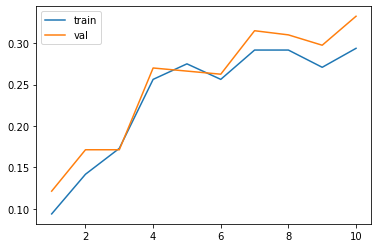

In [ ]:
history_plot(h1)

In [ ]:
model_1.load_weights("model_checkpoints/model_1.ckpt")
model_1.evaluate(validation_data)

250/250 [==============================] - 24s 95ms/step - loss: 1.7143 - accuracy: 0.3394


[1.7143406867980957, 0.33937498927116394]

### Transfer Learning

In [ ]:
IMG_SIZE = 96

inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x = layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False
x = base_model(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model_2.summary()
#tf.keras.layers.Resizing( )

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 96, 96, 3)         0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_10 (Flatten)        (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               589952    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256

In [ ]:
h2 = model_2.fit(
    train_data,
    steps_per_epoch=int(0.1*len(train_data)),
    validation_data=validation_data,
    validation_steps=int(0.1*len(validation_data)),
    epochs=10,
    callbacks=[create_modelcheckpoint_callback("model_2", monitor="val_accuracy")]
                 )

Epoch 1/10
15/15 [==============================] - 174s 12s/step - loss: 2.0421 - accuracy: 0.2396 - val_loss: 1.6380 - val_accuracy: 0.4162
Epoch 2/10
15/15 [==============================] - 167s 12s/step - loss: 1.5546 - accuracy: 0.4208 - val_loss: 1.3511 - val_accuracy: 0.4975
Epoch 3/10
15/15 [==============================] - 138s 10s/step - loss: 1.3165 - accuracy: 0.4979 - val_loss: 1.2172 - val_accuracy: 0.5350
Epoch 4/10
15/15 [==============================] - 123s 9s/step - loss: 1.2630 - accuracy: 0.5312 - val_loss: 1.1273 - val_accuracy: 0.5763
Epoch 5/10
15/15 [==============================] - 123s 9s/step - loss: 1.1990 - accuracy: 0.5729 - val_loss: 1.0520 - val_accuracy: 0.6488
Epoch 6/10
15/15 [==============================] - 122s 9s/step - loss: 1.0547 - accuracy: 0.6333 - val_loss: 0.9957 - val_accuracy: 0.6350
Epoch 7/10
15/15 [==============================] - 123s 9s/step - loss: 1.1143 - accuracy: 0.5917 - val_loss: 0.9370 - val_accuracy: 0.6587
Epoch 8/10

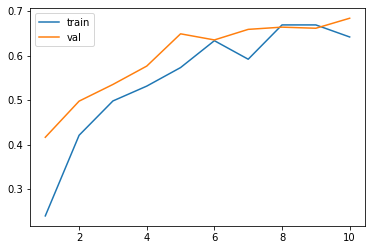

In [ ]:
history_plot(h2)

In [ ]:
model_2.load_weights("model_checkpoints/model_2.ckpt")
model_2.evaluate(validation_data)

 40/250 [===>..........................] - ETA: 10:36 - loss: 0.8914 - accuracy: 0.6828

KeyboardInterrupt: ignored

### Data Augmentation

In [ ]:
IMG_SIZE = 96

inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))

data_augmentation = Sequential([
  #preprocessing.Resizing(96, 96),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
], name="augmentation_layer")
x = data_augmentation(inputs)

x = layers.experimental.preprocessing.Rescaling(1/255.)(x)
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False
x = base_model(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model_3.summary()
#tf.keras.layers.Resizing( )

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 augmentation_layer (Sequent  (None, 96, 96, 3)        0         
 ial)                                                            
                                                                 
 rescaling_13 (Rescaling)    (None, 96, 96, 3)         0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_11 (Flatten)        (None, 4608)              0         
                                                                 
 dense_23 (Dense)            (None, 128)               589952    
                                                           

In [ ]:
h3 = model_3.fit(
    train_data,
    steps_per_epoch=int(0.1*len(train_data)),
    validation_data=validation_data,
    validation_steps=int(0.1*len(validation_data)),
    epochs=5,
    callbacks=[create_modelcheckpoint_callback("model_3", monitor="val_accuracy")]
                 )

Epoch 1/5
15/15 [==============================] - 129s 9s/step - loss: 2.1320 - accuracy: 0.2146 - val_loss: 1.8206 - val_accuracy: 0.3300
Epoch 2/5
15/15 [==============================] - 124s 9s/step - loss: 1.7244 - accuracy: 0.3500 - val_loss: 1.5959 - val_accuracy: 0.4112
Epoch 3/5
15/15 [==============================] - 121s 8s/step - loss: 1.5799 - accuracy: 0.4333 - val_loss: 1.4270 - val_accuracy: 0.4525
Epoch 4/5
15/15 [==============================] - 121s 8s/step - loss: 1.5102 - accuracy: 0.4146 - val_loss: 1.3636 - val_accuracy: 0.4688
Epoch 5/5
15/15 [==============================] - 121s 8s/step - loss: 1.5513 - accuracy: 0.4229 - val_loss: 1.2927 - val_accuracy: 0.5025


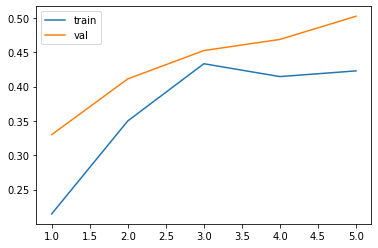

In [ ]:
history_plot(h3)

In [ ]:
model_3.load_weights("model_checkpoints/model_3.ckpt")
model_3.evaluate(validation_data)

### Full traning

In [ ]:
model_4 = tf.keras.models.clone_model(model_3)
model_4.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
h4 = model_4.fit(
    train_data,
    steps_per_epoch=int(len(train_data)),
    validation_data=validation_data,
    validation_steps=int(0.1*len(validation_data)),
    epochs=10,
    callbacks=[create_modelcheckpoint_callback("model_3", monitor="val_accuracy")]
                 )

In [ ]:
history_plot(h4)

In [ ]:
model_4.load_weights("model_checkpoints/model_4.ckpt")
model_4.evaluate(validation_data)